<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
Unique values in each column:
 Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



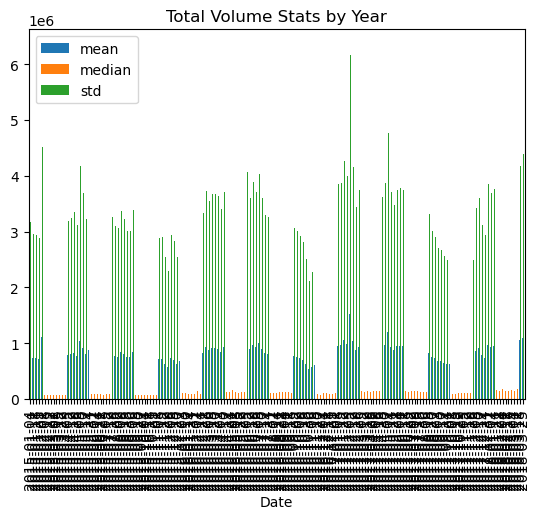

Bags total by type:
                 Small Bags    Large Bags  XLarge Bags
type                                                 
conventional  3.164183e+09  9.259030e+08  56678255.60
organic       1.606877e+08  6.571281e+07     10921.73


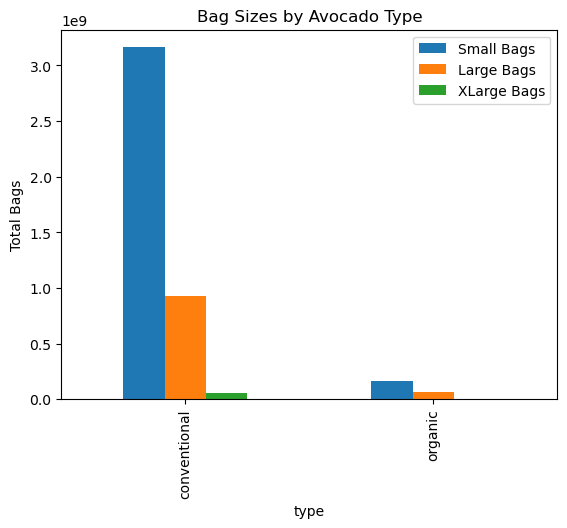

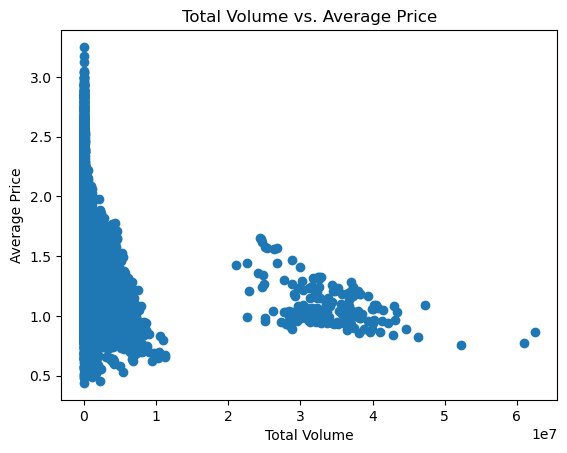

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('hw3_avocado.csv')

df.info()

print("Unique values in each column:\n", df.nunique())

pd.set_option('display.max_rows', None)
print(df)
pd.reset_option('display.max_rows')

print("First five rows and first four columns:\n", df.iloc[:5, :4])
print("Last five rows and last four columns:\n", df.iloc[-5:, -4:])
print("Selected three columns:\n", df[['AveragePrice', 'Total Volume', 'Total Bags']].head())

print("Single column accessed with dot notation:\n", df.AveragePrice.head())

df['EstimatedRevenue'] = df['Total Volume'] * df['AveragePrice']
print("Data with EstimatedRevenue column:\n", df[['Total Volume', 'AveragePrice', 'EstimatedRevenue']].head())

grouped_df = df.groupby(['region', 'type'])['AveragePrice'].mean().reset_index()
print("Grouped data by region and type:\n", grouped_df.head())

volume_stats = df.groupby('Date')['Total Volume'].agg(['mean', 'median', 'std'])
volume_stats.plot(kind='bar', y=['mean', 'median', 'std'], title="Total Volume Stats by Year")
plt.show()

bags_total_df = df.groupby('type')[['Small Bags', 'Large Bags', 'XLarge Bags']].sum()
print("Bags total by type:\n", bags_total_df)

bags_total_df.plot(kind='bar', title="Bag Sizes by Avocado Type")
plt.ylabel("Total Bags")
plt.show()

plt.scatter(df['Total Volume'], df['AveragePrice'])
plt.title("Total Volume vs. Average Price")
plt.xlabel("Total Volume")
plt.ylabel("Average Price")
plt.show()